<a href="https://colab.research.google.com/github/GustavoRT-debug/Sistemas-Embarcados-C213/blob/main/Trabalho_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a501aee197e83d4eb09e3040f4226f54ae8ef6e2e22d30ea7d7375d852483dd8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62117 sha256=19105c6b45020fee37dbb22c0a327320d7e5cb03f1929eb2a97c85f2569581c0
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


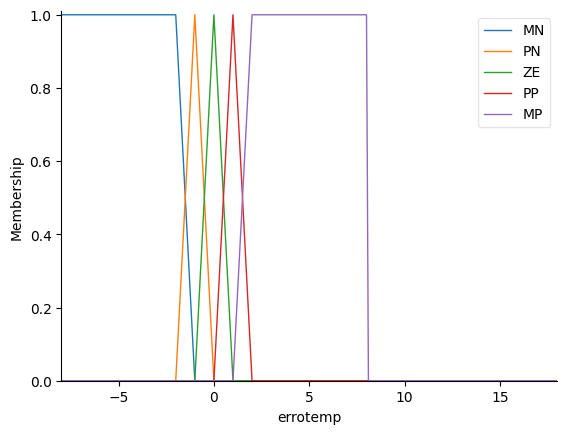

In [16]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

#ERRO=SAIDA-ENTRADA
#SAIDA=(-10,10)
#ENTRADA=(-2/-6/-8)
#ERRO =-10-(-2)=-8
#10-(-6)=-4
#-10-(-8)=-2
#LIMITE SUPERIOR
#ERRO=10-(-2)=12
#10-(-6)=16
#10-(-8)=18

# Universo e funções de pertinência para errotemp
errotemp = ctrl.Antecedent(np.arange(-8, 18.1, 0.1), 'errotemp')
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2, -1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2, -1, 0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe, [1, 2, 8, 8])
errotemp.view()

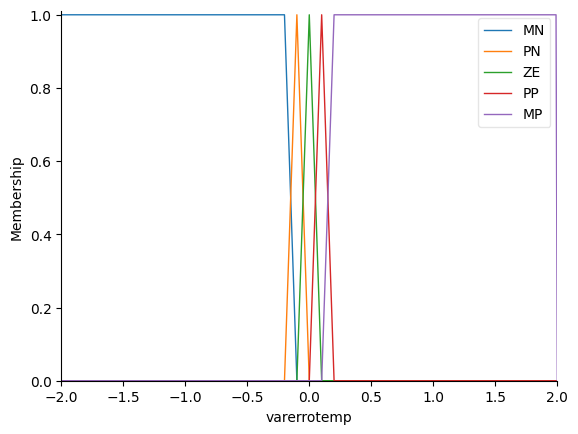

In [11]:
# Universo e funções de pertinência para varerrotemp
varerrotemp = ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2, -0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2, -0.1, 0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe, [0.1, 0.2, 2, 2])
varerrotemp.view()

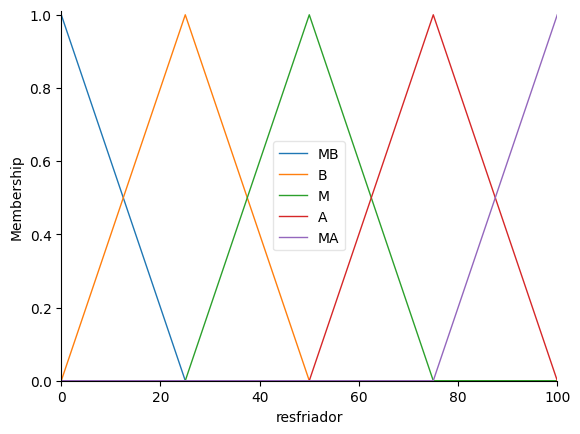

In [13]:
# Universo e funções de pertinência para resfriador
resfriador = ctrl.Consequent(np.arange(0, 101, 1), 'resfriador')
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0, 0, 25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0, 25, 50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])
resfriador.view()

In [14]:
regra1 = ctrl.Rule(errotemp['MN'] & varerrotemp['MN'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['MN'] & varerrotemp['PN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['MN'] & varerrotemp['ZE'], resfriador['MB'])
regra4 = ctrl.Rule(errotemp['PN'] & varerrotemp['MN'], resfriador['MB'])
regra5 = ctrl.Rule(errotemp['PN'] & varerrotemp['PN'], resfriador['B'])
regra6 = ctrl.Rule(errotemp['PN'] & varerrotemp['ZE'], resfriador['B'])
regra7 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MN'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PN'], resfriador['M'])
regra9 = ctrl.Rule(errotemp['ZE'] & varerrotemp['ZE'], resfriador['M'])
regra10 = ctrl.Rule(errotemp['PP'] & varerrotemp['MN'], resfriador['M'])
regra11 = ctrl.Rule(errotemp['PP'] & varerrotemp['PN'], resfriador['A'])
regra12 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], resfriador['A'])
regra13 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], resfriador['A'])
regra17 = ctrl.Rule(errotemp['PP'] & varerrotemp['PP'], resfriador['A'])
regra18 = ctrl.Rule(errotemp['PP'] & varerrotemp['MP'], resfriador['MA'])
regra19 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], resfriador['M'])
regra20 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], resfriador['A'])
regra21 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], resfriador['MA'])
regra22 = ctrl.Rule(errotemp['MP'] & varerrotemp['PP'], resfriador['MA'])
regra23 = ctrl.Rule(errotemp['MP'] & varerrotemp['MP'], resfriador['MA'])
regra24 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], resfriador['M'])
regra25 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], resfriador['A'])

In [15]:
resfriador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
controle = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [25]:

# Parâmetros do Sistema
entrada = int(input('Digite um modo de 1 a 3: '))
setpoint=0
if(entrada==1):
 setpoint=-2
elif(entrada==2):
  setpoint=-6
elif(entrada==3):
  setpoint=-8
else:
  print ("Erro")

temp_atual = 0
print(temp_atual)
erro_anterior = 0

while True:
    controle.input['errotemp'] = erro_anterior
    erro_atual = temp_atual - setpoint
    var_erro_temp = erro_atual - erro_anterior

    controle.input['errotemp'] = erro_atual
    controle.input['varerrotemp'] = var_erro_temp
    controle.compute()

    # Simular mudança de temperatura
    i = 0
    while i < 10:
        temp_atual = temp_atual * 0.9952 - 0.0003963 * controle.output['resfriador']
        time.sleep(1)
        i += 1

    print(f"Potência do resfriador: {controle.output['resfriador']}%")
    print(f"Sensor de temperatura: {temp_atual} °C")

    # Publicar dados no MQTT
    client.publish("Resfriador/Temperatura", temp_atual)
    client.publish("Resfriador/erro", erro_atual)
    client.publish("Resfriador/Potencia", controle.output['resfriador'])

Digite um modo de 1 a 3: 1
0
Potência do resfriador: 87.50000000000222%
Sensor de temperatura: -0.33936750218389233 °C
Potência do resfriador: 89.86816958067035%
Sensor de temperatura: -0.6719776662907999 °C
Potência do resfriador: 89.43735994088257%
Sensor de temperatura: -0.9872921264772602 °C
Potência do resfriador: 89.0059094402557%
Sensor de temperatura: -1.2861208863909759 °C
Potência do resfriador: 88.5790067375035%
Sensor de temperatura: -1.5692560227953571 °C
Potência do resfriador: 88.16027060709612%
Sensor de temperatura: -1.8374664389356443 °C
Potência do resfriador: 75.25308993046625%
Sensor de temperatura: -2.04301698976902 °C
Potência do resfriador: 49.50875340988994%
Sensor de temperatura: -2.1390624818251966 °C
Potência do resfriador: 39.68594861305658%
Sensor de temperatura: -2.192498497926788 °C
Potência do resfriador: 27.53391529202671%
Sensor de temperatura: -2.1962927965497485 °C
Potência do resfriador: 26.29473300830425%
Sensor de temperatura: -2.1951027020181404

KeyboardInterrupt: ignored